# 7.1 Voting(投票)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8125
RandomForestClassifier 0.8625
SVC 0.875
VotingClassifier 0.875


# 7.2 Baging
1. 当将数据集的随机子集绘制为样本的随机子集时，该算法称为Pasting[1]。
2. 如果抽取样本进行替换，则该方法称为Bagging [2]。
3. 当将数据集的随机子集绘制为要素的随机子集时，该方法称为Random Subspaces[3]。
4. 最后，当基于样本和特征的子集建立基本估计器时，该方法称为Random Patches[4]。
n_estimators 集成器中基估计器的数量。
max_features 从 X 抽取的样本数以训练每个基本估计器

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=50 
)
#bootstrap 进行替换是否放回抽样
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

## 7.2.2 OBB（包外）评估
obb_score_ 方法

In [7]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), bootstrap=True, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8833333333333333

# 7.4 随机森林

In [8]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8375

## 7.4.2 极端随机树

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
ex_clf = ExtraTreesClassifier()
ex_clf.fit(X_train, y_train)
y_pred = ex_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.85

## 7.4.3 特征重要性

In [10]:
ex_clf.feature_importances_

array([0.47407738, 0.52592262])

In [11]:
rnd_clf.feature_importances_

array([0.43562147, 0.56437853])

# 7.5 BOOSTING
## 7.5.1 Adaboost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1)
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [13]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.85

## 7.6 XGBOOST

In [40]:
import xgboost
xgb_clf = xgboost.XGBClassifier()
model = xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

[22:47:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [36]:
accuracy_score(y_pred, y_test)

0.9

# 7.7网格搜索调参

## 7.7.1 shap特征值

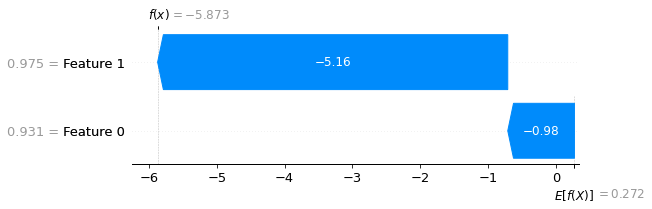

In [41]:
import shap
# 首先创建解释器Explainer
# SHAP支持很多类型的explainer(例如deep, gradient, kernel, linear, tree, sampling)
explainer = shap.Explainer(model)
# 传入特征矩阵X，计算SHAP值
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])



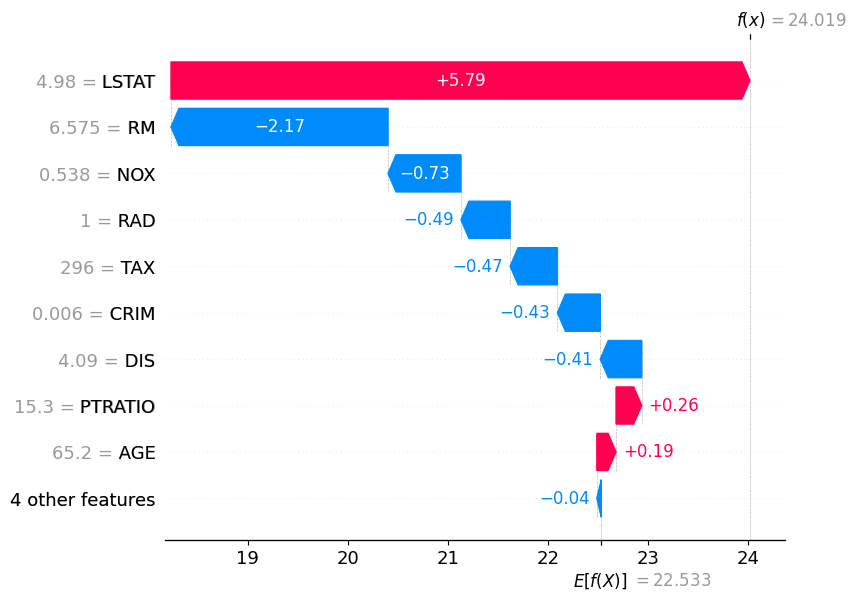

In [2]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

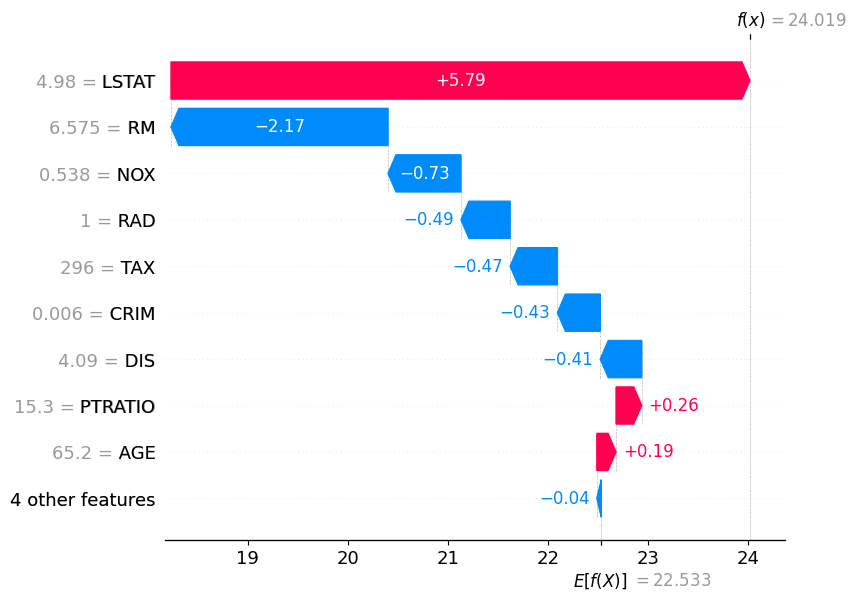

In [3]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [45]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [47]:
shap_values

.values =
array([[-4.28501666e-01, -6.66367188e-02,  7.78602287e-02, ...,
         2.56694555e-01, -5.39071299e-02,  5.78832483e+00],
       [-1.59477890e-01, -3.92092764e-02, -9.65500847e-02, ...,
         4.60188717e-01,  1.29054254e-03,  1.54787719e+00],
       [-6.22594878e-02, -3.92413028e-02, -1.63524270e-01, ...,
         3.61137800e-02,  2.09844872e-01,  7.91517401e+00],
       ...,
       [-3.46925646e-01, -1.13532774e-03, -9.87499580e-02, ...,
        -2.10595775e+00, -8.69371593e-02,  2.02094817e+00],
       [ 3.54982555e-01, -1.44685265e-02, -8.39682892e-02, ...,
        -1.67015433e+00,  9.48226675e-02,  2.35491967e+00],
       [-9.26840603e-01, -2.58212350e-03, -2.59856015e-01, ...,
        -1.92664945e+00, -3.10639203e-01,  6.63177595e-02]], dtype=float32)

.base_values =
array([22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.53

In [55]:
explainer

In [56]:
explainer.expected_value

22.532942

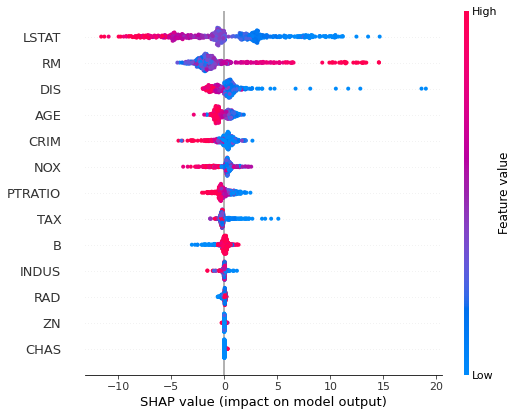

In [58]:
shap.summary_plot(shap_values, X)

In [6]:
import catboost
from catboost import *
model2 = CatBoostRegressor(iterations=300, learning_rate=0.1, random_seed=123)
model2.fit(X, y, verbose=False, plot=False)

In [7]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])